## Different Store Sales Dataset

The dataset comprises a record of a supermarket retail company's sales across the US throughout 2016. It contains details such as invoice ID, customer ID, region, state, category, gender, quantity, unit selling price, unit cost price, purchase date and time, payment method, and shopping mall. The objective is to thoroughly refine this dataset and extract meaningful insights to answer specific questions.

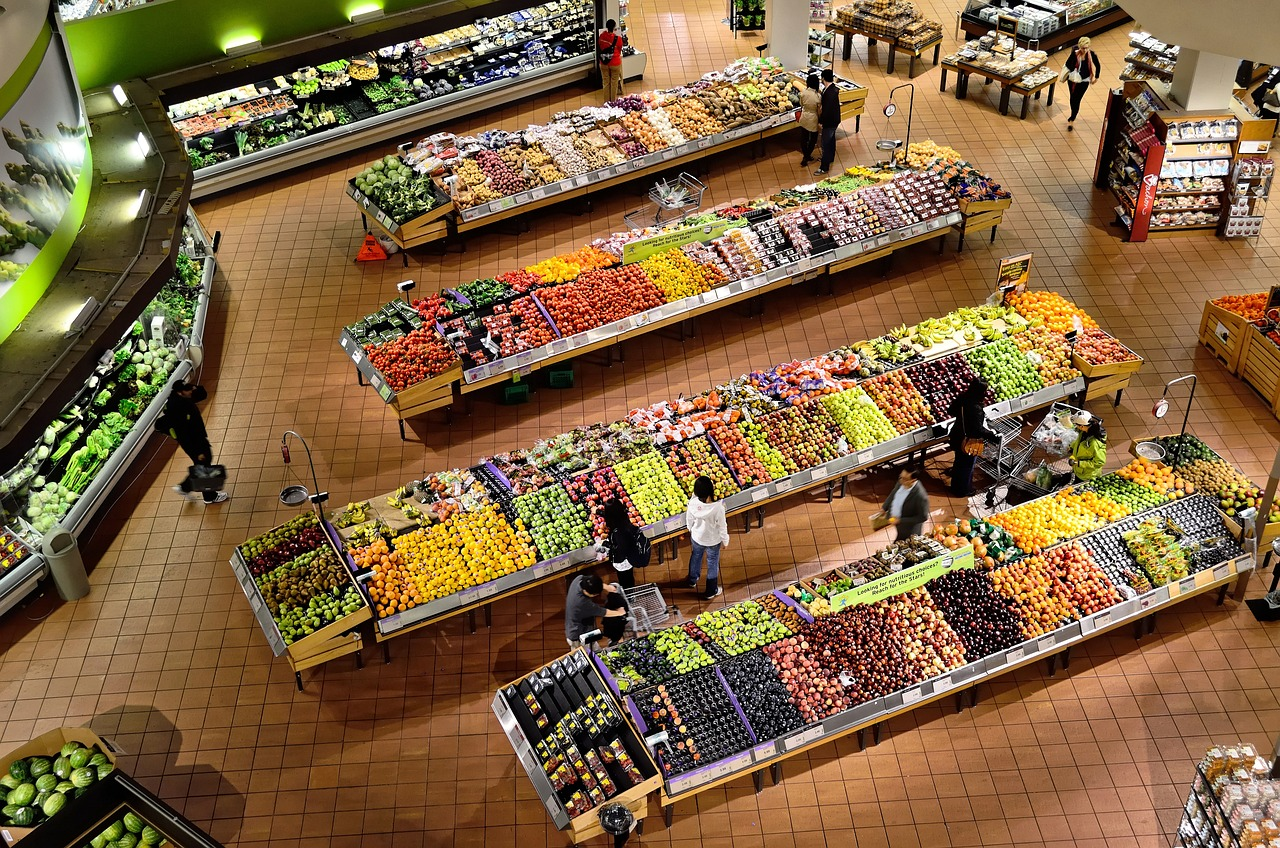

Work process  
Step 1: Basic Data understanding   
Step 2: Data cleaning  
Step 3: Data Insights and Data Visualization  
Step 4: Recommendations based on insights

## Questions to be address  
1.What is the purchasing power breakdown according to customer demographics particulaly; age groups?  
2.Which gender group comprises our largest customer base?  
3.Which product category is experiencing the highest sales?  
4.Which product category has the highest selling price averagely?  
5.How is the overall performance of our shopping malls?  
6.Is there a correlation between the selling price and cost price?  
7.How does sales performance vary across different states?  
8.What is the preferred payment method among our customers?  
9.What region currently leads in sales?

In [31]:
#importin libraries
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [32]:
#importing csv file or data
# sl is a variable that contains the data

sl = pd.read_csv("Different_stores_dataset.csv")


In [33]:
#Checking the first ten rows

sl.head(10)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon
5,I227836,10/30/2016 9:59,C657758,Female,28,Clothing,5,1500.40,1475.380,Credit Card,West,Oregon,Viaport Outlet
6,I121056,10/30/2016 9:59,C151197,Female,49,Cosmetics,1,40.66,35.462,Cash,West,California,Istinye Park
7,I293112,10/30/2016 9:59,C176086,Female,32,Clothing,2,600.16,450.120,Credit Card,West,California,Mall of Istanbul
8,I293455,10/30/2016 10:00,C159642,Male,69,Clothing,3,900.24,675.180,Credit Card,West,California,Metrocity
9,I326945,10/30/2016 10:00,C283361,Female,60,Clothing,2,600.16,450.120,Credit Card,West,California,Kanyon


In [34]:
#Checking the last ten rows

sl.tail(10)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
99447,I281214,11/15/2016 12:42,C288090,Female,37,Toys,3,107.52,80.6400,Cash,Central,Illinois,Metropol AVM
99448,I332105,11/15/2016 12:42,C231387,Female,65,Shoes,4,2400.68,2280.6460,Credit Card,East,Pennsylvania,Metropol AVM
99449,I134399,11/15/2016 12:42,C953724,Male,65,Clothing,1,300.08,225.0600,Cash,West,California,Kanyon
99450,I170504,11/15/2016 12:43,C226974,Female,28,Books,1,15.15,10.6050,Cash,West,Arizona,Zorlu Center
99451,I675411,11/15/2016 12:43,C513603,Male,50,Toys,5,179.20,143.3600,Cash,South,Alabama,Metropol AVM
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park
99456,I232867,11/15/2016 12:44,C273973,Female,36,Souvenir,3,35.19,24.6330,Credit Card,South,Georgia,Mall of Istanbul


In [35]:
#checking quick statistics of the data

sl.describe()

,age,quantity,selling_price_per_unit,cost_price_per_unit
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.004424,689.256321,605.113854
std,14.990054,1.415237,941.184567,858.838256
min,18.000000,1.000000,5.230000,3.661000
25%,30.000000,2.000000,45.450000,31.815000
50%,43.000000,3.000000,203.300000,162.640000
75%,56.000000,4.000000,1200.320000,1080.306000
max,69.000000,15.000000,5250.000000,4725.000000


In [36]:
#Brief info on the dataset

sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


In [37]:
#Columns of the dataset

list(sl.columns)

['invoice_no',
 'invoice_date',
 'customer_id',
 'gender',
 'age',
 'category',
 'quantity',
 'selling_price_per_unit',
 'cost_price_per_unit',
 'payment_method',
 'region',
 'state',
 'shopping_mall']

In [38]:
#Checking the coloumns and rows of the dataset

sl.shape

(99457, 13)

In [39]:
#Checking for duplicates

sl.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99452    False
99453    False
99454    False
99455    False
99456    False
Length: 99457, dtype: bool

In [40]:
sl[sl.duplicated()]

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall


In [41]:
#Data type of each columns

sl.dtypes

invoice_no                 object
invoice_date               object
customer_id                object
gender                     object
age                         int64
category                   object
quantity                    int64
selling_price_per_unit    float64
cost_price_per_unit       float64
payment_method             object
region                     object
state                      object
shopping_mall              object
dtype: object

In [42]:
# Unique values of Invoice_ID 

sl.invoice_no.unique()

array(['I138884', 'I317333', 'I127801', ..., 'I824010', 'I702964',
       'I232867'], dtype=object)

In [43]:
# Unique values of ages
sl['age'].unique()

array([28, 21, 20, 66, 53, 49, 32, 69, 60, 36, 29, 67, 25, 24, 65, 42, 46,
       23, 27, 52, 44, 51, 50, 68, 43, 59, 54, 48, 40, 41, 19, 18, 22, 61,
       45, 64, 33, 63, 34, 47, 38, 57, 30, 26, 62, 39, 55, 56, 35, 31, 37,
       58], dtype=int64)

In [44]:
# Unique values of states
sl.state.unique()

array(['Kentucky', 'California', 'Florida', 'Oregon', 'Idaho',
       'North Carolina', 'Washington', 'Texas', 'Iowa', 'Pennsylvania',
       'Illinois', 'Michigan', 'Delaware', 'Indiana', 'New York',
       'Arizona', 'Virginia', 'Tennessee', 'Alabama', 'Colorado', 'Ohio',
       'Massachusetts', 'Georgia'], dtype=object)

In [45]:
#Renaming payment_method column to Payment_mode

sl.rename({"payment_method":"Payment_mode"}, axis = 1, inplace = True)
sl.rename({"category":"product_category"}, axis = 1, inplace = True)
sl.head()

,invoice_no,invoice_date,customer_id,gender,age,product_category,quantity,selling_price_per_unit,cost_price_per_unit,Payment_mode,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


In [46]:
#changing datatypes 

sl['gender'] = sl['gender'].astype("category")
sl['product_category'] = sl['product_category'].astype("category")
sl['shopping_mall'] = sl['shopping_mall'].astype("category")
sl['invoice_date'] = pd.to_datetime(sl['invoice_date'])

print(sl.dtypes)

invoice_no                        object
invoice_date              datetime64[ns]
customer_id                       object
gender                          category
age                                int64
product_category                category
quantity                           int64
selling_price_per_unit           float64
cost_price_per_unit              float64
Payment_mode                      object
region                            object
state                             object
shopping_mall                   category
dtype: object


In [47]:
#Count of gender

sl["gender"].value_counts()

Female    59482
Male      39975
Name: gender, dtype: int64

In [48]:
#Count of product_category

sl["product_category"].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: product_category, dtype: int64

In [55]:
sl['Payment_mode'].value_counts()

Cash           44447
Credit Card    34931
Debit Card     20079
Name: Payment_mode, dtype: int64

## Visualization of the Dataset

<Axes: title={'center': 'Purchases by Age Groups'}, xlabel='Age_category', ylabel='count'>

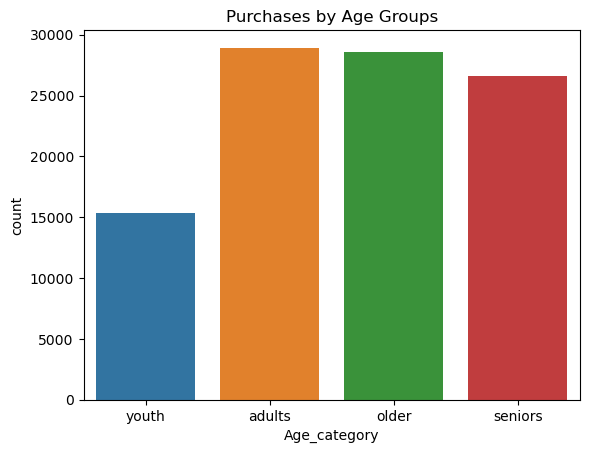

In [76]:
#Transactions by age group
sl["Age_category"] = pd.cut(sl.age, [0, 25,40, 55, 71], labels=["youth", "adults", "older", "seniors"])
plt.title('Purchases by Age Groups')
sns.countplot(x='Age_category',data=sl)

''

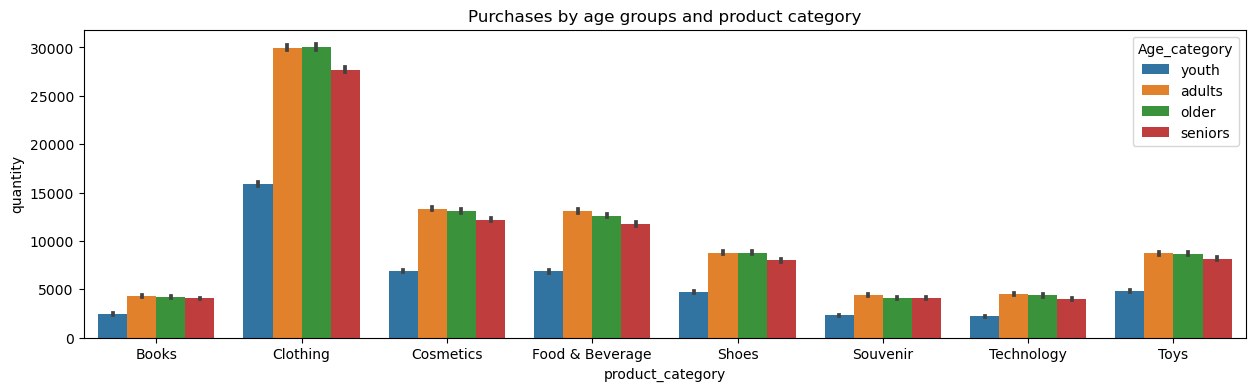

In [77]:
#Sales quantity by age groups and product category
plt.figure(figsize=(15,4))
plt.title('Purchases by age groups and product category')
sns.barplot(x='product_category',y='quantity',data=sl,hue='Age_category',estimator=sum)
''

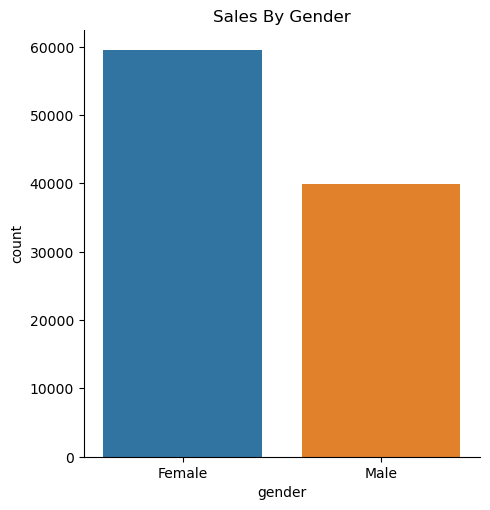

In [78]:
#plotting of sales by gender

sns.catplot(x="gender",data=sl,kind='count')
plt.title('Sales By Gender')
plt.show()

In [79]:
#Grouping quantity by product_category

pdt_quantity = sl.groupby("product_category")["quantity"].sum()
pdt_quantity=pdt_quantity.to_frame()
pdt_quantity.sort_values(by="quantity", inplace =True)
pdt_quantity.index

CategoricalIndex(['Souvenir', 'Books', 'Technology', 'Shoes', 'Toys',
                  'Food & Beverage', 'Cosmetics', 'Clothing'],
                 categories=['Books', 'Clothing', 'Cosmetics', 'Food & Beverage', 'Shoes', 'Souvenir', 'Technology', 'Toys'], ordered=False, dtype='category', name='product_category')

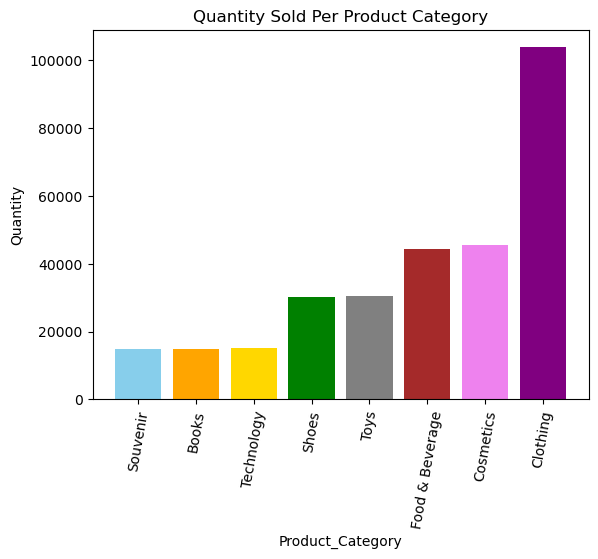

In [80]:
#Plotting sales quantity by product_category

plt.bar(pdt_quantity.index, pdt_quantity["quantity"],  color=['skyblue','orange','gold','green','grey','brown','violet','purple'] )
plt.title("Quantity Sold Per Product Category")
plt.xlabel("Product_Category")
plt.ylabel("Quantity")
plt.xticks(rotation=80)
plt.show()

In [81]:
#Grouping average selling price by product category

avg_sp_pcat = sl.groupby("product_category")["selling_price_per_unit"].mean()
avg_sp_pcat= avg_sp_pcat.to_frame()
avg_sp_pcat.sort_values(by="selling_price_per_unit", inplace =True)
avg_sp_pcat.index


CategoricalIndex(['Food & Beverage', 'Souvenir', 'Books', 'Toys', 'Cosmetics',
                  'Clothing', 'Shoes', 'Technology'],
                 categories=['Books', 'Clothing', 'Cosmetics', 'Food & Beverage', 'Shoes', 'Souvenir', 'Technology', 'Toys'], ordered=False, dtype='category', name='product_category')

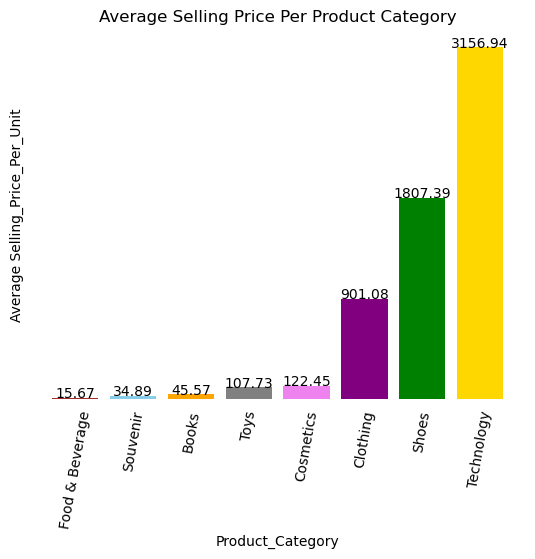

In [82]:
#Plotting average selling price by product_category
for i in range(len(avg_sp_pcat.index)):
    plt.text(i, avg_sp_pcat['selling_price_per_unit'][i]+2, round(avg_sp_pcat['selling_price_per_unit'][i],2),
             horizontalalignment = 'center',
             fontdict={'fontsize':10,'fontweight':2},color = 'black')

# Taking off all ticks
plt.tick_params(axis='x', which='both', top=False,bottom=False, labelleft=False,reset=True)
plt.tick_params(axis='y', which='both', right=False,left=False, labelleft=False,reset=True)

# Taking off spines
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
    

plt.bar(avg_sp_pcat.index, avg_sp_pcat["selling_price_per_unit"],  color=['brown','skyblue','orange','grey','violet','purple','green','gold'] )
plt.title("Average Selling Price Per Product Category")
plt.xlabel("Product_Category")
plt.ylabel("Average Selling_Price_Per_Unit")
plt.xticks(rotation=80)
plt.show()


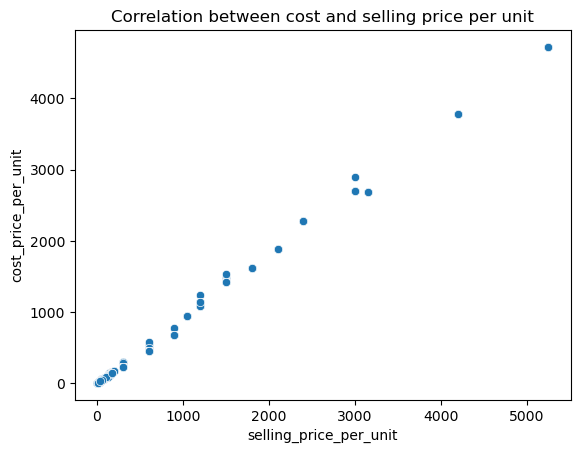

In [83]:
# creating a scatterplot for cost price and selling price  

sns.scatterplot(x='selling_price_per_unit',y='cost_price_per_unit',data = sl)
plt.title('Correlation between cost and selling price per unit')
plt.show()

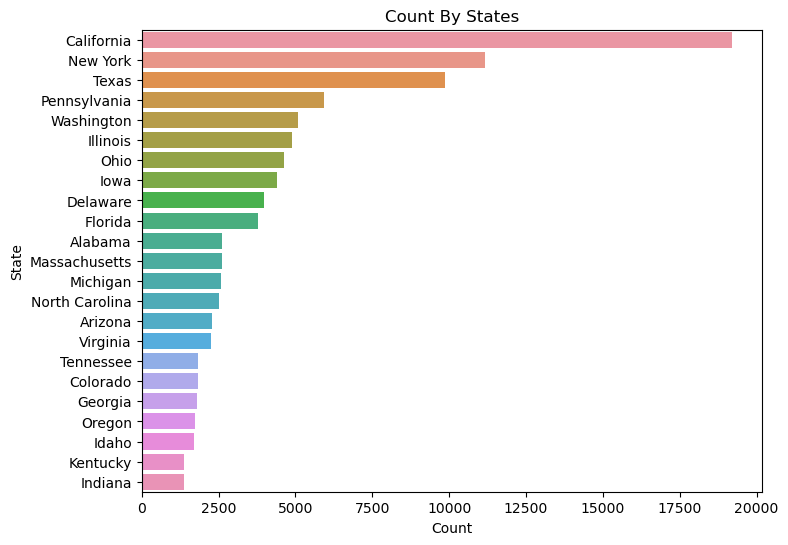

In [84]:
#count of sale records by states

state_counts = sl['state'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 6))  
plt.title('Count By States')
sns.countplot(y=sl['state'], order=state_counts.index)
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

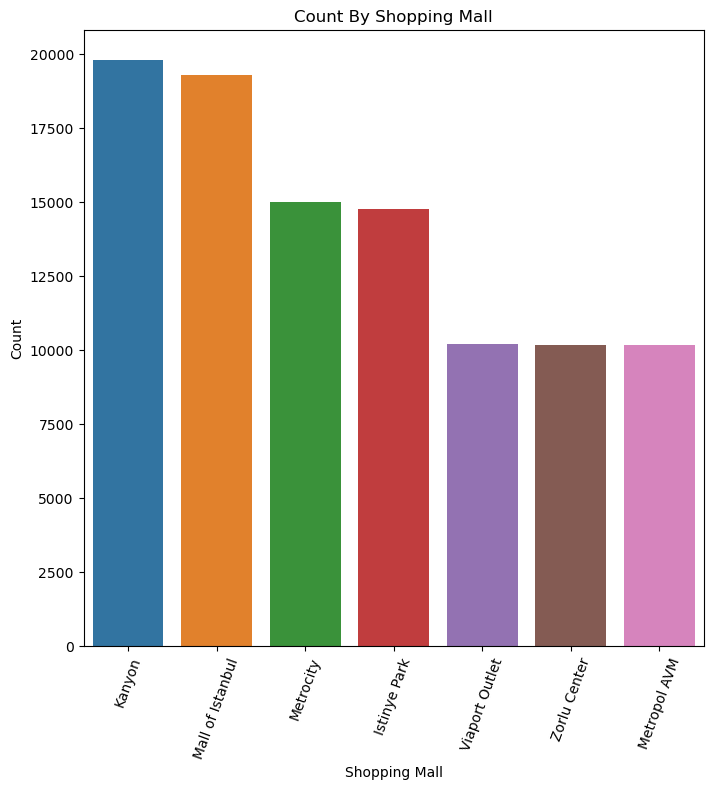

In [85]:
# #Count of sales of each shopping mall and sort the values

shopping_mall_counts = sl['shopping_mall'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 8))  
sns.countplot(x="shopping_mall", data=sl, order=shopping_mall_counts.index)
plt.title('Count By Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.show()

In [86]:
sl.head()

,invoice_no,invoice_date,customer_id,gender,age,product_category,quantity,selling_price_per_unit,cost_price_per_unit,Payment_mode,region,state,shopping_mall,Age_category
0,I138884,2016-10-30 09:58:00,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,adults
1,I317333,2016-10-30 09:58:00,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,youth
2,I127801,2016-10-30 09:58:00,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity,youth
3,I173702,2016-10-30 09:58:00,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM,seniors
4,I337046,2016-10-30 09:59:00,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon,older


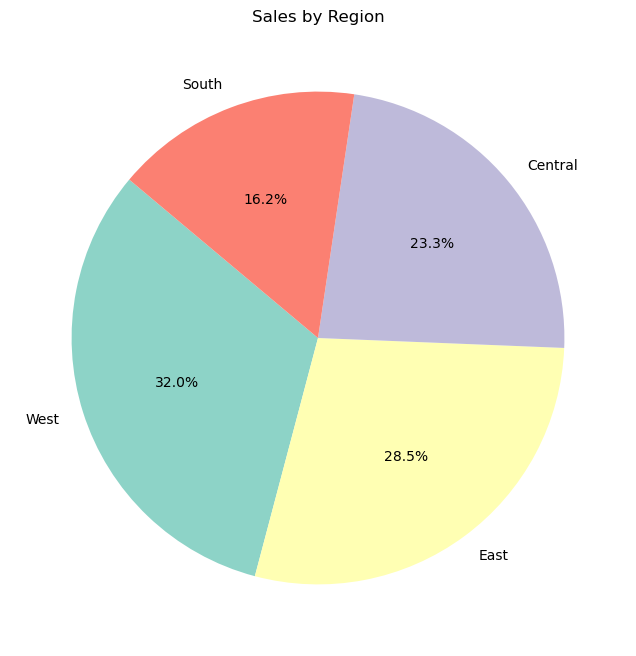

In [87]:
#Transactions mad by each region
mall_total_cost = sl.groupby('region')['quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.pie(mall_total_cost, labels=mall_total_cost.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Sales by Region')
plt.show()

Text(0.5, 1.0, 'Popular Payment Method')

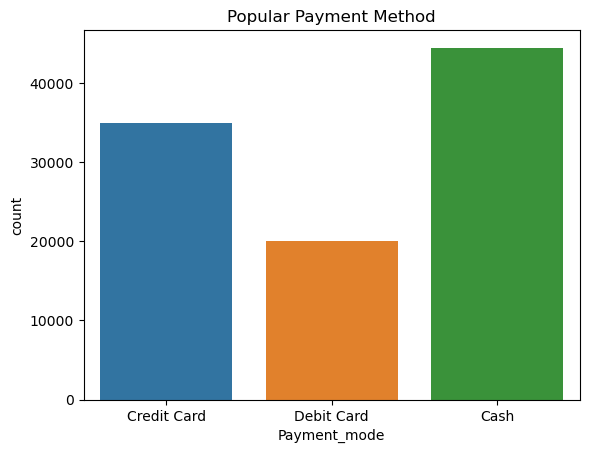

In [88]:
sns.countplot(x='Payment_mode',data=sl)
plt.title('Popular Payment Method')

## INSIGHTS AND RECOMMENDATIONS
-Primary Customer Demographics: Our primary customer base comprises adults and older individuals, indicating a need to maintain this loyal segment while exploring strategies to attract and engage younger customers for sustained growth.

-Gender-Based Customer Preference: Women form the predominant gender among our customer base, suggesting successful appeal and potential avenues for targeted marketing initiatives to further enhance engagement.

-Top Selling Categories and Pricing Dynamics: Clothing stands out as the most popular purchase, followed by cosmetics, food and beverages, toys, shoes, technology, books, and souvenirs. Notably, technology commands the highest selling price, while shoes and clothing maintain competitive pricing. This insight highlights both popular product categories and potential areas for optimizing pricing strategies to maximize revenue.

-Correlation Between Selling and Cost Prices: A strong positive correlation between selling and cost prices signifies the effectiveness of pricing strategies. This correlation can be leveraged to optimize margins and ensure profitability across various products.

-States Sales Performance and Strategies: California demonstrates robust sales performance, while Indiana lags behind. There's an opportunity to bolster sales in Indiana through increased advertising efforts and enhanced customer retention strategies tailored to local preferences.

-Shopping Mall Performance Rankings: Kanyon leads the pack among malls, followed by Mall of Istanbul, Metrocity, Istinye Park, Viaport Outlet, Zorlu Center, and Metropol AVM. Understanding the success factors behind Kanyon's performance can offer insights to enhance the performance of other malls.

-Preferred Payment Method: Cash remains the favored payment method among customers, emphasizing the importance of retaining this segment while exploring additional payment options to cater to evolving preferences.

-Regional Sales Performance Breakdown: The West region exhibits strong sales performance, followed by the East, while the Central and South regions show relatively lower sales. Targeted marketing initiatives and region-specific strategies should be explored and implemented to enhance sales in the less performing regions for a more balanced market presence.







##  Conclusion
-Engaging Younger Demographics: Develop strategies to attract and engage younger customers to ensure sustained growth.

-Targeted Marketing for Women: Implement targeted marketing initiatives to further enhance engagement with the predominant female customer base.

-Pricing Optimization: Explore pricing optimization strategies, especially in categories like technology, shoes, and clothing, to maximize revenue.

-Enhanced Strategies for Indiana: Increase advertising efforts and develop customer retention strategies specific to Indiana to improve sales performance.

-Replicating Success Factors in Malls: Analyze factors contributing to Kanyon's success and apply insights to enhance performance in other malls.

-Payment Method Diversification: Explore additional payment options while retaining the preference for cash to cater to evolving customer preferences.